In [28]:
<a href=\"https://colab.research.google.com/github/profmcnich/example_notebook/blob/main/student_survey_analysis.ipynb\" target=\"_parent\"><img src=\"https://colab.research.google.com/assets/colab-badge.svg\" alt=\"Open In Colab\"/></a>

SyntaxError: invalid syntax (<ipython-input-28-0272d47b27a6>, line 1)

# Data Wrangling with Pandas 

In [2]:
import pandas as pd
import numpy as np

In this program I practice two basic skills in data analysis:

1. Filtering
2. Group Bys

This is based on an assignment I did for another class.

# Load in the data file (data = apartment listings in NYC)

In [3]:
df = pd.read_csv('data/listings.csv', sep=',')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,175,3,48,2019-11-04,0.37,2,365
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,75,1,340,2020-08-01,4.75,1,265
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,29,50,2019-12-02,0.37,1,365
3,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66120,-73.99423,Entire home/apt,175,14,1,2014-01-02,0.01,1,295
4,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,65,2,473,2020-03-15,3.44,1,340


# Practice Filtering

Filter 1: Listings with a price less than $100

In [4]:
filter1 = df['price'] < 100
df[filter1].shape[0]

22778

Filter 2: Number of listings just in Brooklyn

In [5]:
filter2 = df['neighbourhood_group'] == 'Brooklyn'
df[filter2].shape[0]

18632

Filter 3: Number of listings in Brooklyn with price less than $100

In [6]:
len(df[filter1 & filter2])

10473

Using .isin() select anyone that has the host name of Michael, David, John, and Daniel.

In [7]:
df[df['host_name'].isin(['Michael', 'David', 'John', 'Daniel'])]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
52,16595,LOFT HAVEN ~ Six Windows ~ Bricks ~ Plants ~ Q...,64522,Daniel,Brooklyn,Williamsburg,40.70933,-73.96792,Entire home/apt,271,1,172,2020-07-14,1.44,1,365
201,61747,"Cozy, Brooklyn, Prospect Park Studio",299370,David,Brooklyn,Prospect-Lefferts Gardens,40.65979,-73.96180,Entire home/apt,91,14,97,2018-01-31,0.83,1,44
209,62903,Beautiful modern studio apartment in heart of NYC,306605,Daniel,Manhattan,Chelsea,40.74238,-73.99567,Entire home/apt,205,15,68,2019-12-14,0.67,2,89
220,64015,Prime East Village 1 Bedroom,146944,David,Manhattan,East Village,40.72807,-73.98594,Entire home/apt,200,3,0,NaN,NaN,1,0
260,74073,Food & Music Dream Apartment in Williamsburg,211877,Daniel,Brooklyn,Williamsburg,40.71113,-73.96054,Entire home/apt,187,30,90,2020-07-31,0.81,1,261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46362,44639591,Central & Stylish 1 Bedroom Apt - Heart of Che...,286136716,John,Manhattan,Chelsea,40.74568,-73.99694,Entire home/apt,110,30,0,NaN,NaN,3,110
46396,44661297,Flushing Sunshine home #101,361579037,Daniel,Queens,Flushing,40.74603,-73.82837,Private room,52,1,0,NaN,NaN,2,360
46403,44662157,Flushing Sunshine home #102,361579037,Daniel,Queens,Flushing,40.74441,-73.82829,Private room,55,1,3,2020-08-16,3.00,2,365
46455,44697211,David’s Queen Sized Room,343477029,David,Queens,Far Rockaway,40.59460,-73.75875,Private room,95,1,0,NaN,NaN,1,365


Create a new column called `adjusted_price` that has $100 added to every listing in Williamsburg.  
 

In [8]:
cond = df['neighbourhood'] == 'Williamsburg'
# the syntax for np.where (because I alsways forget):
# np.where(the rows where I want the calculation to happen, apply this value if that condition is met, apply this other value if the condition is not met)
df['adjusted_price'] = df['price'] + np.where(cond, 100, 0)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,adjusted_price
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,175,3,48,2019-11-04,0.37,2,365,175
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,75,1,340,2020-08-01,4.75,1,265,75
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,29,50,2019-12-02,0.37,1,365,60
3,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66120,-73.99423,Entire home/apt,175,14,1,2014-01-02,0.01,1,295,175
4,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,65,2,473,2020-03-15,3.44,1,340,65


What % of the rooms are private, and what % of the rooms are shared.

In [9]:
df.room_type.value_counts() / df.room_type.value_counts().sum()

Entire home/apt    0.515787
Private room       0.454446
Shared room        0.021213
Hotel room         0.008554
Name: room_type, dtype: float64

# Practice Group Bys

Using groupby, count how many listings are in each neighbourhood_group.

In [10]:
df.groupby('neighbourhood_group').count()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,adjusted_price
neighbourhood_group,,,,,,,,,,,,,,,,
Bronx,1183,1181,1183,1183,1183,1183,1183,1183,1183,1183,1183,957,957,1183,1183,1183
Brooklyn,18632,18626,18632,18624,18632,18632,18632,18632,18632,18632,18632,14865,14865,18632,18632,18632
Manhattan,20580,20570,20580,20555,20580,20580,20580,20580,20580,20580,20580,15197,15197,20580,20580,20580
Queens,5791,5791,5791,5789,5791,5791,5791,5791,5791,5791,5791,4513,4513,5791,5791,5791
Staten Island,341,341,341,341,341,341,341,341,341,341,341,284,284,341,341,341


Using groupby, find the mean price for each of the neighbourhood_groups.

In [11]:
df.groupby('neighbourhood_group')['price'].mean()

neighbourhood_group
Bronx             92.751479
Brooklyn         120.225258
Manhattan        191.880466
Queens            99.754965
Staten Island    110.947214
Name: price, dtype: float64

Using groupby and .agg(), find the min and max price for each of the neighbourhood_groups.


In [12]:
df.groupby(['neighbourhood_group'])['price'].agg(['count', 'min', 'max', 'mean' ,'median', 'std'])

,count,min,max,mean,median,std
neighbourhood_group,,,,,,
Bronx,1183,16,1404,92.751479,69,95.787081
Brooklyn,18632,0,10000,120.225258,90,180.136376
Manhattan,20580,0,10000,191.880466,129,428.682578
Queens,5791,0,10000,99.754965,70,207.648739
Staten Island,341,19,1200,110.947214,79,122.676152


# AI Meme

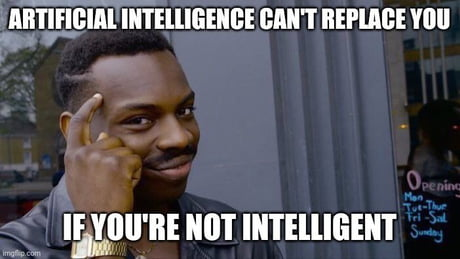

In [13]:
from IPython import display
display.Image('aeAznm5_460s.jpeg')